In [1]:
import time
import pandas as pd
from tqdm import tqdm
from apriori import apriori
from util import association_rules, transaction_to_df
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


In [2]:
odf = pd.read_csv("../../data/ibm_2021.csv")
df = odf.groupby(['transaction_id']).item_id.apply(tuple).reset_index(name='item')
df["length"] = df.item.apply(lambda x: len(x))
df
df = transaction_to_df(df)

In [3]:
res_dict = {
    "min_sup":[],
    "min_conf":[],
    "time":[],
    "rule_num":[]
}
for s in range(201):
    if s == 0 : continue
    for c in tqdm(range(201)):
        start = time.time()
        result = apriori(df, min_support=(s/200))
        if len(result) == 0:
            res_dict['rule_num'].append(0)
        else:
            rules = association_rules(result, min_support=(s/200), min_conf=(c/200))
            res_dict['rule_num'].append(len(rules))
        interval = time.time() - start
        res_dict['min_sup'].append(s/200)
        res_dict['min_conf'].append(c/200)
        res_dict['time'].append(interval)
    

100%|██████████| 201/201 [00:00<00:00, 299.89it/s]


In [4]:
res_df = pd.DataFrame(res_dict)
res_df

,min_sup,min_conf,time,rule_num
0,0.005,0.000,10.341909,67002
1,0.005,0.005,10.158500,67002
2,0.005,0.010,10.127568,67002
3,0.005,0.015,10.178739,67002
4,0.005,0.020,10.181696,67002
...,...,...,...,...
40195,1.000,0.980,0.003303,0
40196,1.000,0.985,0.003247,0
40197,1.000,0.990,0.003243,0
40198,1.000,0.995,0.003244,0


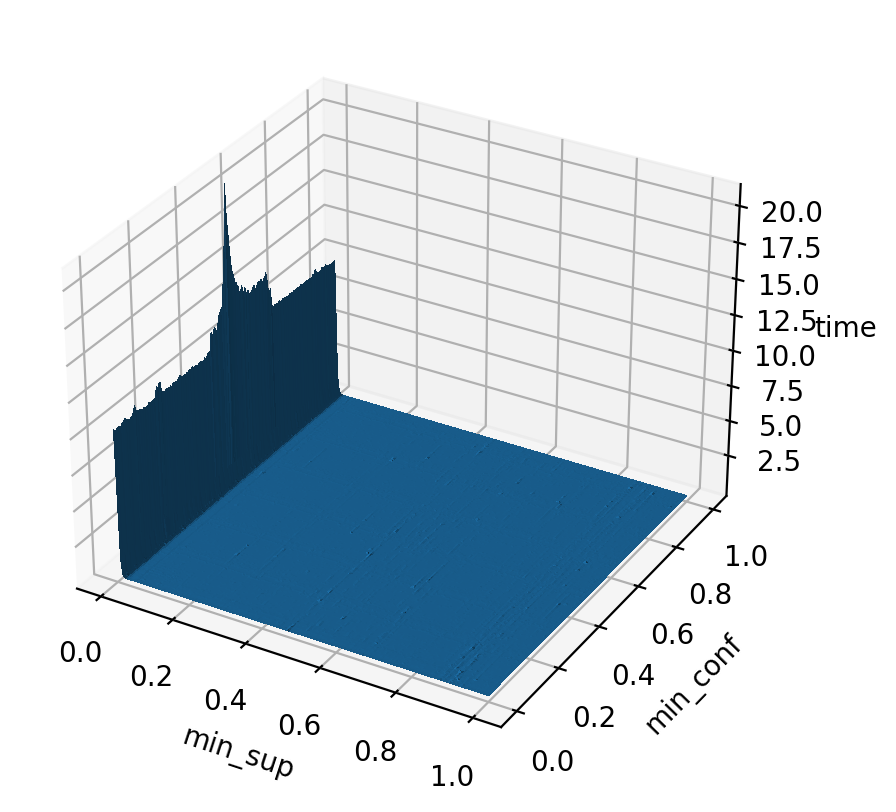

In [5]:



fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)
X = res_df.min_sup
Y = res_df.min_conf
Z = res_df.time
# zi = matplotlib.mlab.griddata(X, Y, Z, xi, yi, interp='linear')


# Plot a basic wireframe.
ax.set_xlabel('min_sup')
ax.set_ylabel('min_conf')
ax.set_zlabel('time')
ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)

plt.show()

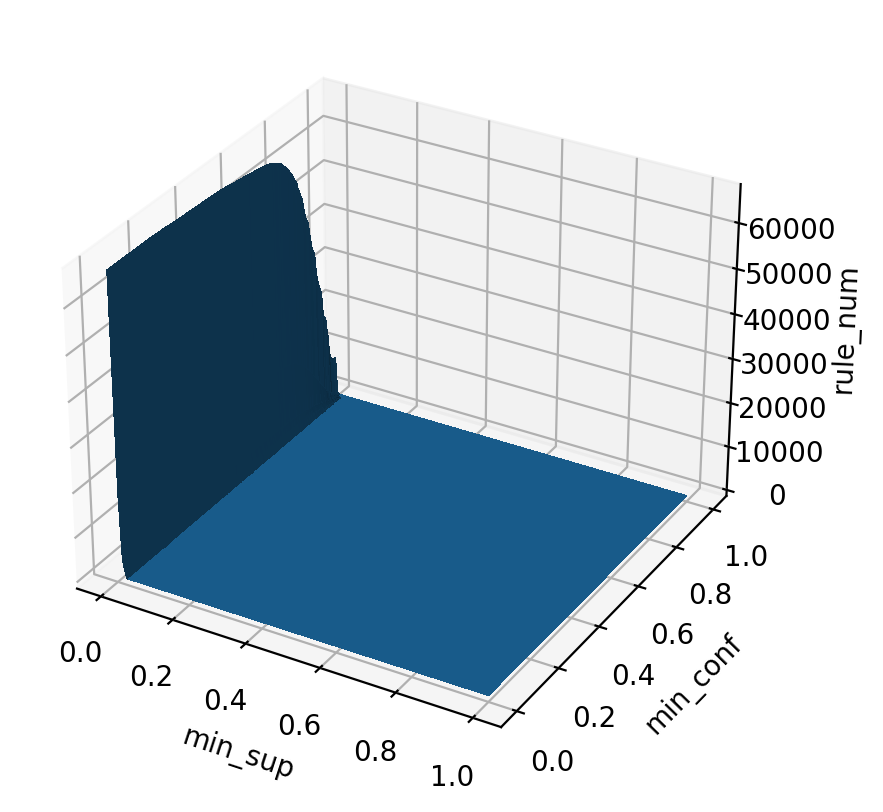

In [6]:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)
X = res_df.min_sup
Y = res_df.min_conf
Z = res_df.rule_num
# zi = matplotlib.mlab.griddata(X, Y, Z, xi, yi, interp='linear')


# Plot a basic wireframe.
ax.set_xlabel('min_sup')
ax.set_ylabel('min_conf')
ax.set_zlabel('rule_num')
ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)

plt.show()